In [2]:
# importing the standard Python modules
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
from os import path
if not path.exists("avergra2.bmp"):
    !wget https://users.itk.ppke.hu/~horan/'avergra2.bmp'

--2021-03-24 17:20:44--  https://users.itk.ppke.hu/~horan/'avergra2.bmp'
Resolving users.itk.ppke.hu (users.itk.ppke.hu)... 193.225.109.33
Connecting to users.itk.ppke.hu (users.itk.ppke.hu)|193.225.109.33|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-03-24 17:20:44 ERROR 404: Not Found.



In [4]:
def Uint8ToCell(arr):
    # this function convertrs an array from unit8, 0-255, oBlack, 255White
    # to -1White, 1Black
    arr = (-1)*((arr.astype(np.float))/127.5-1.0)
    return arr

In [5]:
def CellToUint8(arr):
    # this function converts an array from unit8, 0-255, oBlack, 255White
    # to -1White, 1Black
    arr = ((arr*-1)+1.0)*127.5;
    arr = arr.astype(np.uint8)
    return arr

(1, 64, 64, 1)


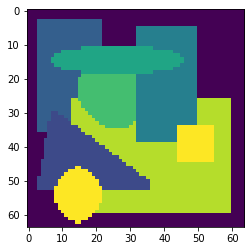

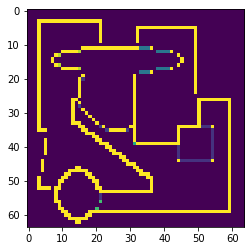

In [6]:
h = 0.1
IterNum = 50
Size = [64,64]

img = cv2.imread('avergra2.bmp')
img = Uint8ToCell(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

bimg = np.reshape(img, [1, img.shape[0], img.shape[1], 1])

x0 = tf.constant(bimg, dtype=tf.float32)
U = tf.constant(bimg, dtype=tf.float32)

B = tf.transpose(tf.Variable(np.array([[[[-1.0, -1.0, -1.0],
                                         [-1.0, 8.0, -1.0],
                                         [-1.0, -1.0, -1.0]]]]),
                             dtype=tf.float32), perm=[2, 3, 0, 1])
A = tf.transpose(tf.Variable(np.array([[[[0, 0, 0],
                                         [0, 1.0, 0],
                                         [0, 0, 0]]]]),
                             dtype=tf.float32), perm=[2, 3, 0, 1])
Z = tf.Variable([-1.0], dtype=tf.float32)

InputCoupling = tf.nn.conv2d(U, B, strides=[1, 1, 1, 1], padding='SAME')

InputCoupling = InputCoupling+Z

t = 0
x = x0
for it in range(IterNum):
    y = tf.clip_by_value(x, -1.0, 1.0)
    OutputCoupling = tf.nn.conv2d(y, A, strides=[1, 1, 1, 1], padding='SAME')
    x = x+h*(-1*(x) + OutputCoupling + InputCoupling)
out = tf.clip_by_value(x, -1.0, 1.0)
print(out.shape)
outimg = out[0, :, :, 0]
plt.imshow(img)  # displaying the input image
plt.figure()
plt.imshow(outimg)

In [7]:
np.save('ExpectedOutput.npy', outimg)